In [1]:
from random_stock_price_generator import RandomStockPrices
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

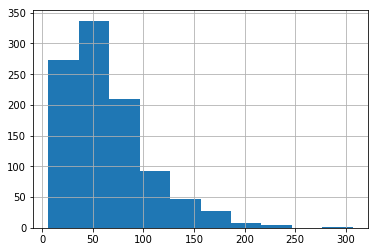

In [2]:
rp = RandomStockPrices()
prices = rp.prices
returns = rp.returns
distributions = rp.distributions
initial_prices = prices.iloc[0,:].hist()

In [3]:
prices.head()

,TICK0,TICK1,TICK2,TICK3,TICK4,TICK5,TICK6,TICK7,TICK8,TICK9,...,TICK990,TICK991,TICK992,TICK993,TICK994,TICK995,TICK996,TICK997,TICK998,TICK999
2018-01-01,200.110985,40.540554,34.741277,66.891373,55.020925,132.236244,39.740616,40.146693,50.222160,33.083738,...,109.377246,63.853037,28.246913,177.628663,74.487387,15.867516,47.568870,50.843568,68.211794,43.584564
2018-01-02,199.317580,39.512069,34.783396,67.731557,55.789117,134.264673,40.093390,40.094822,50.583631,32.476942,...,109.196958,66.717645,28.322721,177.053328,75.400675,16.124277,48.289530,53.393854,67.193623,45.566834
2018-01-03,198.502964,38.745100,34.127437,68.938949,56.571185,138.341941,40.720995,40.252402,49.393040,31.955244,...,108.019240,64.152015,28.443002,177.174725,77.272146,16.120162,48.143922,51.390194,67.705118,46.164763
2018-01-04,198.407507,38.185656,33.669755,68.076023,57.566283,138.678149,40.612886,40.143189,49.138259,32.049538,...,111.309254,64.241384,28.591960,176.333449,76.362069,16.268151,47.376245,50.871967,68.002579,45.603284
2018-01-05,196.583634,39.629237,33.599114,67.402128,55.487142,137.681244,40.911244,40.675525,48.980503,32.059887,...,116.546664,60.331956,28.446198,173.403796,74.441479,16.407375,44.168350,53.407646,68.308201,46.211390


In [4]:
first = distributions[0]
first

(0.08407662482183975, 0.12809856913791717)

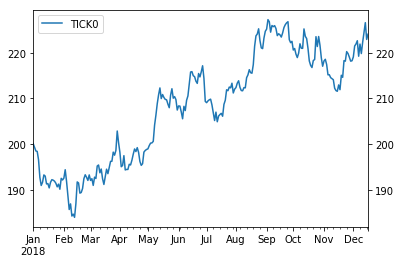

In [6]:
first_plot = prices[['TICK0']].plot()
first_plot.tick_params(labelright=True, right=True)
plt.show()

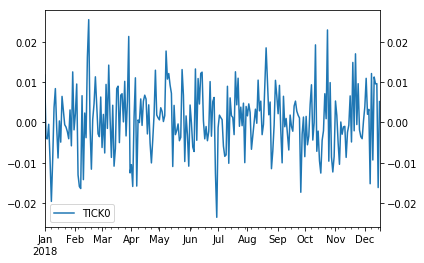

In [8]:
returns_first_plot = returns[['TICK0']].plot()
returns_first_plot.tick_params(labelright=True, right=True)
plt.show()

In [9]:
first_returns = returns[['TICK0']].values
mu = round(first_returns.mean() * 252, 4)
std = round(first_returns.std() * np.sqrt(252), 4)
print('mean is : ', mu)
print('std is : ', std)

mean is :  0.1327
std is :  0.1275


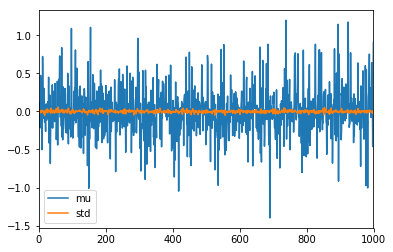

avg mu diff: -0.0019
avg std diff: -0.0008
avg initial price: 64.5188
avg ending price: 69.4219


In [12]:
mu_diffs = []
std_diffs = []
for i in range(len(returns.columns)):
    rets = returns[['TICK{}'.format(i)]].values
    mu = round(rets.mean()*252, 4)
    std = round(rets.std()*np.sqrt(252), 4)
    dist = rp.distributions[i]
    dist_mu = round(dist[0],4)
    dist_std = round(dist[1], 4)
    mu_diff = (mu-dist_mu)
    std_diff = (std-dist_std)
    if std > 0.0:
        mu_diffs.append(mu_diff)
        std_diffs.append(std_diff)

diff_df = pd.DataFrame({'mu': mu_diffs, 'std': std_diffs})
plot = diff_df.plot()
plt.show()
print('avg mu diff: {0:.4f}'.format(diff_df['mu'].mean()))
print('avg std diff: {0:.4f}'.format(diff_df['std'].mean()))
print('avg initial price: {0:.4f}'.format(prices.iloc[0,:].mean()))
print('avg ending price: {0:.4f}'.format(prices.iloc[-1,:].mean()))